<a href="https://colab.research.google.com/github/Bharatgwl/DEEPFAKE/blob/main/SDXL_TRAIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!pip install -U transformers \accelerate \peft \safetensors

In [ ]:
import torch
import diffusers
import transformers
import peft

print(f"PyTorch version: {torch.__version__}")
print(f"Diffusers version: {diffusers.__version__}")
print(f"PEFT version: {peft.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")

if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")
else:
    print("Warning: No GPU detected. Training will be extremely slow.")

PyTorch version: 2.9.0+cu126
Diffusers version: 0.37.0.dev0
PEFT version: 0.18.1
CUDA available: True
GPU: Tesla T4


In [ ]:
ZIP_PATH = "/content/drive/MyDrive/sdxl_dreambooth_inputs/dreambooth_images_20260208_190241.zip"


In [ ]:
import os, zipfile
IMAGE_DIR = "/content/training_images"
os.makedirs(IMAGE_DIR, exist_ok=True)

with zipfile.ZipFile(ZIP_PATH, "r") as z:
    z.extractall(IMAGE_DIR)

print(f"✅ Extracted {len(os.listdir(IMAGE_DIR))} images")

✅ Extracted 14 images


In [ ]:
from huggingface_hub import login

# Get your token from: https://huggingface.co/settings/tokens
login()

In [ ]:
pip uninstall -y diffusers

Found existing installation: diffusers 0.36.0
Uninstalling diffusers-0.36.0:
  Successfully uninstalled diffusers-0.36.0


In [ ]:
!pip install git+https://github.com/huggingface/diffusers.git

  Cloning https://github.com/huggingface/diffusers.git to /tmp/pip-req-build-w4g3t0pq
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers.git /tmp/pip-req-build-w4g3t0pq
  Resolved https://github.com/huggingface/diffusers.git to commit fd705bd8ffe61fbe2814525821452f04d4e8773f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
import diffusers; print(diffusers.__version__)

0.37.0.dev0


In [ ]:
!accelerate launch /content/diffusers/examples/dreambooth/train_dreambooth_lora_sdxl.py \
  --pretrained_model_name_or_path stabilityai/stable-diffusion-xl-base-1.0 \
   --instance_data_dir="/content/training_images" \
  --output_dir /content/sdxl_lora \
  --instance_prompt "a photo of bharat person" \
  --resolution 1024 \
  --train_batch_size 1 \
  --gradient_accumulation_steps 4 \
  --learning_rate 1e-4 \
  --lr_scheduler constant \
  --lr_warmup_steps 0 \
  --max_train_steps 800 \
  --checkpointing_steps 200 \
  --mixed_precision fp16

print("✅ Training complete!")

# !accelerate launch /content/diffusers/examples/dreambooth/train_dreambooth_lora_sdxl.py \
#   --pretrained_model_name_or_path stabilityai/stable-diffusion-xl-base-1.0 \
#   --instance_data_dir /content/sdxl_images \
#   --output_dir /content/sdxl_lora \
#   --instance_prompt "a photo of bharat person" \
#   --resolution 1024 \
#   --train_batch_size 1 \
#   --gradient_accumulation_steps 4 \
#   --learning_rate 1e-4 \
#   --lr_scheduler constant \
#   --lr_warmup_steps 0 \
#   --max_train_steps 800 \
#   --checkpointing_steps 200 \
#   --validation_prompt="a photo of bharat person, high quality, detailed"\
#   --mixed_precision fp16

The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_processes` was set to a value of `1`
	`--num_machines` was set to a value of `1`
	`--mixed_precision` was set to a value of `'no'`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
You are using a model of type clip_text_model to instantiate a model of type . This is not supported for all configurations of models and can yield errors.
You are using a model of type clip_text_model to instantiate a model of type . This is not supported for all configurations of models and can yield errors.
/usr/lo

In [ ]:
from huggingface_hub import HfApi, create_repo

REPO_ID = "Bharatgwl/sdxl-Bharat-lora"

# Create repository
create_repo(REPO_ID, repo_type="model", private=True, exist_ok=True)
print(f"✅ Created repo: {REPO_ID}")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


✅ Created repo: Bharatgwl/sdxl-Bharat-lora


In [ ]:
model_card = """---
license: creativeml-openrail-m
base_model: stabilityai/stable-diffusion-xl-base-1.0
tags:
  - stable-diffusion-xl
  - stable-diffusion-xl-diffusers
  - text-to-image
  - diffusers
  - lora
  - dreambooth
instance_prompt: a photo of Bharat person
---

# SDXL DreamBooth LoRA - sdxl-Bharat-lora

This is a LoRA (Low-Rank Adaptation) model trained with DreamBooth on Stable Diffusion XL.

## Trigger Word
`Bharat`

## Usage
```python
from diffusers import StableDiffusionXLPipeline
import torch

pipe = StableDiffusionXLPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16
).to("cuda")

pipe.load_lora_weights("Bharatgwl/sdxl-Bharat-lora")

prompt = "a photo of Bharat person, professional portrait, studio lighting"
image = pipe(prompt, num_inference_steps=30).images[0]
image.save("output.png")
```

## Training Details
- **Base Model:** stabilityai/stable-diffusion-xl-base-1.0
- **Training Steps:** 800
- **Learning Rate:** 0.0001
- **Resolution:** 1024x1024
- **Batch Size:** 1
- **Instance Prompt:** a photo of Bharat person
- **Images:** 14
"""

with open("/content/sdxl_lora/README.md", "w") as f:
    f.write(model_card)

In [ ]:
api = HfApi()
api.upload_folder(
    folder_path="/content/sdxl_lora",
    repo_id=REPO_ID,
    repo_type="model"
)

Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

  ...ckpoint-600/scheduler.bin: 100%|##########| 1.40kB / 1.40kB            

  .../checkpoint-600/scaler.pt: 100%|##########| 1.38kB / 1.38kB            

  ...ckpoint-800/optimizer.bin:   0%|          |  178kB / 47.4MB            

  ..._lora_weights.safetensors:   0%|          | 94.1kB / 23.4MB            

  ..._lora_weights.safetensors:   0%|          | 94.1kB / 23.4MB            

  ...ckpoint-200/optimizer.bin:   0%|          |  178kB / 47.4MB            

  ...ckpoint-200/scheduler.bin: 100%|##########| 1.40kB / 1.40kB            

  ..._lora_weights.safetensors:   0%|          | 94.1kB / 23.4MB            

  ..._lora_weights.safetensors:   0%|          | 94.1kB / 23.4MB            

  .../checkpoint-200/scaler.pt: 100%|##########| 1.38kB / 1.38kB            

CommitInfo(commit_url='https://huggingface.co/Bharatgwl/sdxl-Bharat-lora/commit/a9975f7e07a57385a5f5ca2c8ac91308856237b6', commit_message='Upload folder using huggingface_hub', commit_description='', oid='a9975f7e07a57385a5f5ca2c8ac91308856237b6', pr_url=None, repo_url=RepoUrl('https://huggingface.co/Bharatgwl/sdxl-Bharat-lora', endpoint='https://huggingface.co', repo_type='model', repo_id='Bharatgwl/sdxl-Bharat-lora'), pr_revision=None, pr_num=None)

In [ ]:

print(f"🎉 Model uploaded successfully!")
print(f"View at: https://huggingface.co/{REPO_ID}")


🎉 Model uploaded successfully!
View at: https://huggingface.co/Bharatgwl/sdxl-Bharat-lora


In [ ]:
from diffusers import StableDiffusionXLPipeline
import torch

Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading weights:   0%|          | 0/196 [00:00<?, ?it/s]

Loading weights:   0%|          | 0/517 [00:00<?, ?it/s]

pytorch_lora_weights.safetensors:   0%|          | 0.00/23.4M [00:00<?, ?B/s]

No LoRA keys associated to CLIPTextModel found with the prefix='text_encoder'. This is safe to ignore if LoRA state dict didn't originally have any CLIPTextModel related params. You can also try specifying `prefix=None` to resolve the warning. Otherwise, open an issue if you think it's unexpected: https://github.com/huggingface/diffusers/issues/new
No LoRA keys associated to CLIPTextModelWithProjection found with the prefix='text_encoder_2'. This is safe to ignore if LoRA state dict didn't originally have any CLIPTextModelWithProjection related params. You can also try specifying `prefix=None` to resolve the warning. Otherwise, open an issue if you think it's unexpected: https://github.com/huggingface/diffusers/issues/new


Generating test images...


  0%|          | 0/30 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/diffusers/pipelines/stable_diffusion_xl/pipeline_stable_diffusion_xl.py:748: FutureWarning: `upcast_vae` is deprecated and will be removed in version 1.0.0. `upcast_vae` is deprecated. Please use `pipe.vae.to(torch.float32)`. For more details, please refer to: https://github.com/huggingface/diffusers/pull/12619#issue-3606633695.
  deprecate(


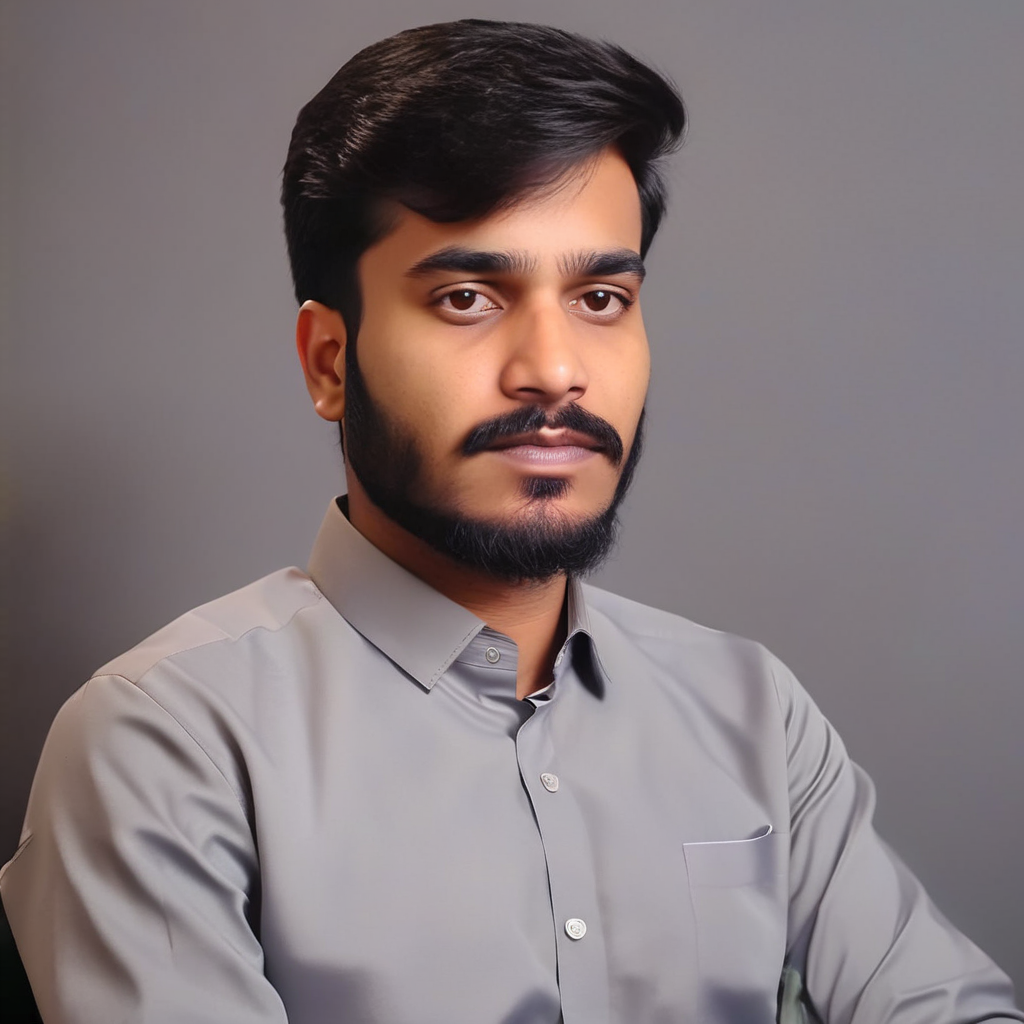

  0%|          | 0/30 [00:00<?, ?it/s]

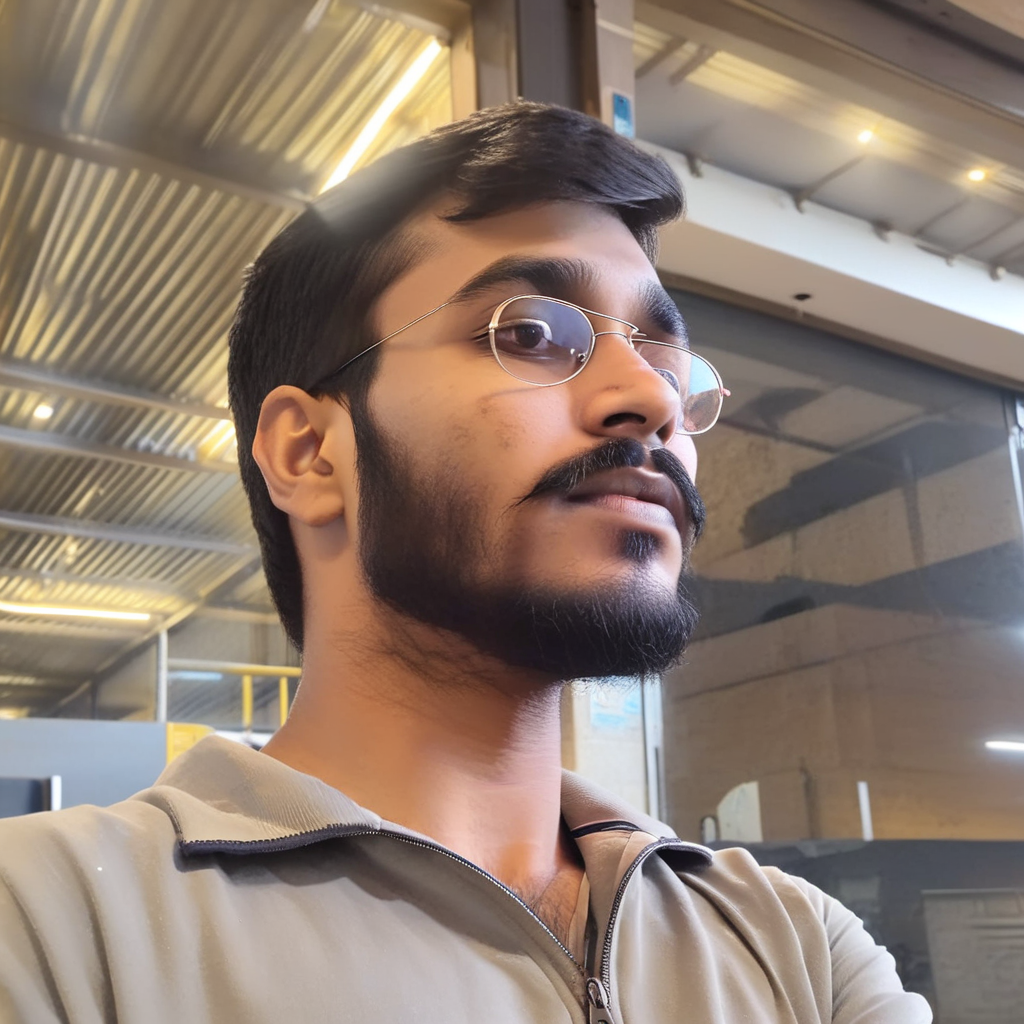

  0%|          | 0/30 [00:00<?, ?it/s]

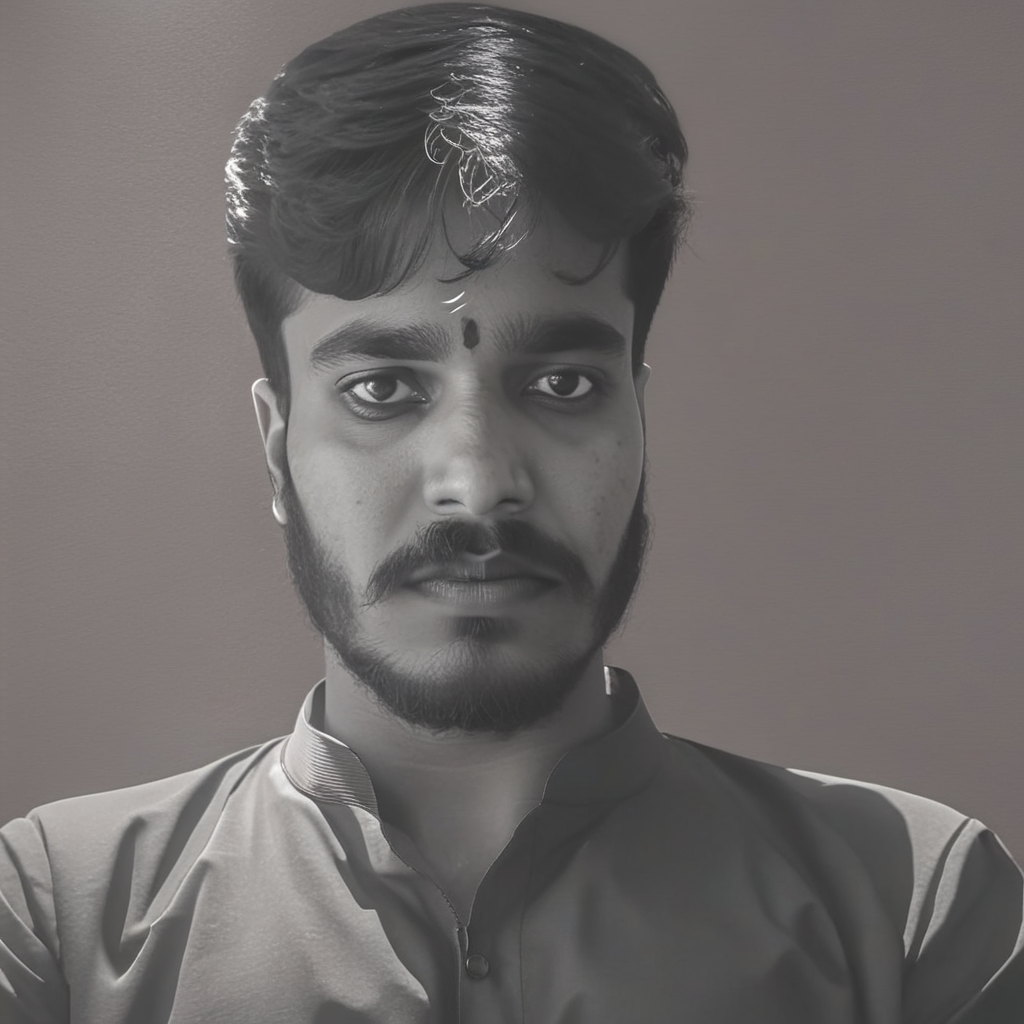

✅ All done! Check your model at https://huggingface.co/Bharatgwl/sdxl-Bharat-lora


In [ ]:
pipe = StableDiffusionXLPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16
).to("cuda")

pipe.load_lora_weights(REPO_ID)

test_prompts = [
    "a photo of Bharat person, professional headshot, 8k",
    "a photo of Bharat person, casual outdoor photo, natural lighting",
    "a photo of Bharat person, artistic portrait, dramatic lighting"
]

print("Generating test images...")
for i, prompt in enumerate(test_prompts):
    image = pipe(prompt, num_inference_steps=30).images[0]
    image.save(f"/content/test_{i+1}.png")
    display(image)

print("✅ All done! Check your model at https://huggingface.co/Bharatgwl/sdxl-Bharat-lora")